XGBoost Accuracy: 93.00%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


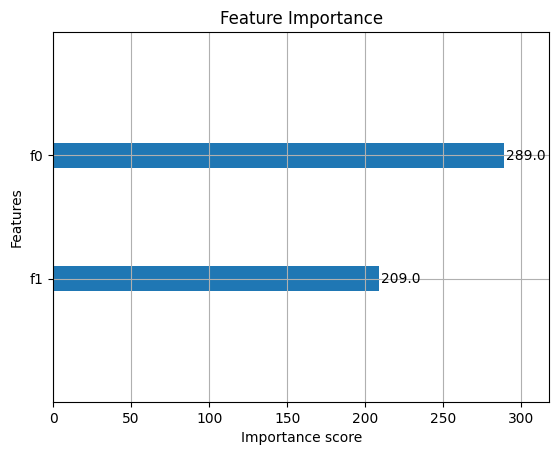

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate Data
X, y = make_moons(n_samples=1000, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train XGBoost
# XGBoost uses a specific data structure called DMatrix for speed,
# but can also accept standard numpy arrays/pandas dataframes.
model = xgb.XGBClassifier(
    n_estimators=100,     # Number of trees (boosting rounds)
    learning_rate=0.1,    # How much each tree contributes (lower is usually better but slower)
    max_depth=3,          # Keep individual trees shallow to prevent overfitting
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# 3. Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# 4. Feature Importance (Why XGBoost is great for analysis)
# It tells you which features mattered most
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()